In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 6000

In [3]:
def model():
    numpyro.sample('x', dist.MultivariateNormal(loc=np.array([5., 10.]), covariance_matrix=[[3., 5.], 
                                                                                            [5., 10.]]))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(mode='vector'), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

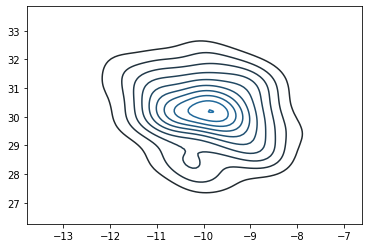

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.6056: 100%|██████████| 6000/6000 [00:16<00:00, 365.96it/s]


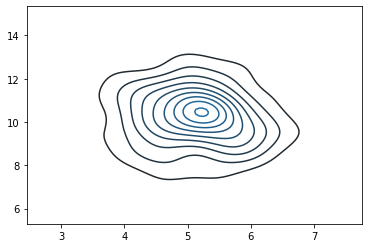

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([[ 4.3415065,  8.575882 ],
             [ 6.0880146,  9.613939 ],
             [ 5.644531 , 10.51308  ],
             [ 5.1025295,  9.752896 ],
             [ 6.3403955, 10.175967 ],
             [ 5.5616593, 11.778687 ],
             [ 5.4802833, 11.939805 ],
             [ 5.0840387, 12.241227 ],
             [ 5.7593255,  9.978447 ],
             [ 4.6290255,  9.327708 ],
             [ 6.136131 ,  8.495111 ],
             [ 5.623501 ,  9.086584 ],
             [ 5.7836633,  9.228463 ],
             [ 5.1964607,  9.676791 ],
             [ 5.171915 , 11.14388  ],
             [ 3.887235 , 11.51052  ],
             [ 4.698989 ,  8.0658   ],
             [ 5.308059 , 10.281203 ],
             [ 4.480654 , 10.744743 ],
             [ 5.372611 , 10.806832 ],
             [ 6.80762  ,  9.588278 ],
             [ 4.8172054, 11.855969 ],
             [ 4.52997  ,  8.192065 ],
             [ 4.991576 ,  7.750676 ],
             [ 3.8061407, 12.364055 ],
             [ 4.7436504,